# Binary Classification of Machine Failures

<img src="https://gesrepair.com/wp-content/uploads/shutterstock_1320746720.jpg" width="600">

In this project, the goal is to predict potential machine failures based on operational sensor data. Proactively identifying failures is crucial for implementing predictive maintenance, which helps minimize downtime and reduce operational costs. The dataset is from a Kaggle Playground Series competition , and the task is a **binary classification problem** where the target variable is `Machine failure`.

The dataset for this competition was generated from a deep learning model trained on the original [Machine Failure Predictions](https://www.kaggle.com/datasets/dineshmanikanta/machine-failure-predictions) dataset. Feature distributions are close to, but not exactly the same as, the original.

### Features Description

* **Type**: Quality variant of the product (categorical: 'L' for low, 'M' for medium, 'H' for high).
* **Air temperature [K]**: Ambient air temperature in Kelvin (numeric).
* **Process temperature [K]**: Temperature of the production process in Kelvin (numeric).
* **Rotational speed [rpm]**: The speed at which the machine's tool rotates, in revolutions per minute (numeric).
* **Torque [Nm]**: The rotational force produced by the machine's motor, in Newton-meters (numeric).
* **Tool wear [min]**: The amount of time the tool has been in use, in minutes (numeric).
* **Machine failure**: The target variable, indicating whether a failure occurred (binary: 1 for failure, 0 for no failure).
* **TWF**: A flag indicating if a Tool Wear Failure occurred (binary). This is a specific type of failure.
* **HDF**: A flag indicating if a Heat Dissipation Failure occurred (binary). This is a specific type of failure.
* **PWF**: A flag indicating if a Power Failure occurred (binary). This is a specific type of failure.
* **OSF**: A flag indicating if an Overstrain Failure occurred (binary). This is a specific type of failure.
* **RNF**: A flag indicating if a Random Failure occurred (binary). This is a specific type of failure.

The dataset was taken from Kaggle:

[Kaggle | Binary Classification of Machine Failures ](https://www.kaggle.com/competitions/playground-series-s3e17/overview) 

## Data Read

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## EDA - Exploratory Data Analysis

In [3]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
train.tail()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0
136428,136428,L47937,L,296.9,308.1,1557,39.3,229,0,0,0,0,0,0


In [5]:
train.shape

(136429, 14)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
train.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
train['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

In [9]:
train['Product ID'].value_counts()

Product ID
L53257    139
L49056    131
L53271    131
L54275    120
L48892    120
         ... 
M24614      1
H39399      1
M15853      1
H32637      1
L48036      1
Name: count, Length: 9976, dtype: int64

In [10]:
train['Type'].value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

In [11]:
train.columns = train.columns.str.replace(' ', '_')

In [12]:
train.columns = train.columns.str.replace('[\[\]]', '', regex=True)

In [13]:
test.columns = test.columns.str.replace(' ', '_')

In [14]:
test.columns = test.columns.str.replace('[\[\]]', '', regex=True)

In [15]:
train.columns

Index(['id', 'Product_ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [16]:
train.describe()

,id,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

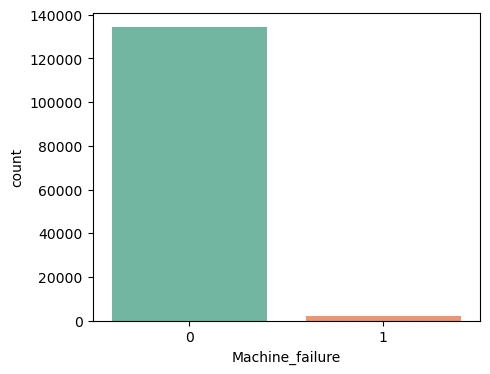

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='Machine_failure', data=train, palette="Set2");

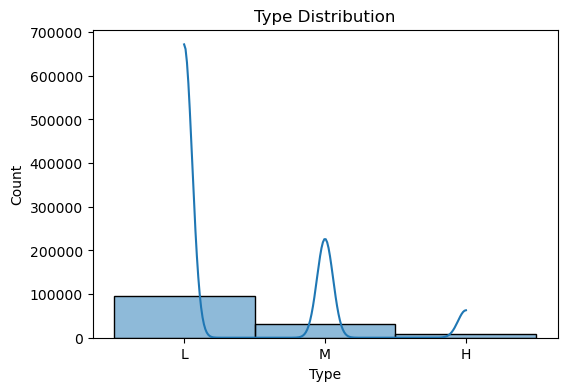

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(train['Type'], bins=30, kde=True)
plt.title("Type Distribution");

<Axes: xlabel='Air_temperature_K', ylabel='Count'>

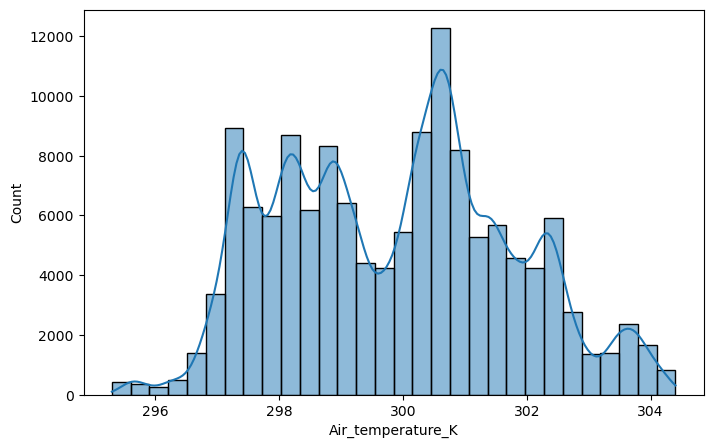

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(train['Air_temperature_K'], kde=True, bins=30)

<Axes: xlabel='Process_temperature_K', ylabel='Count'>

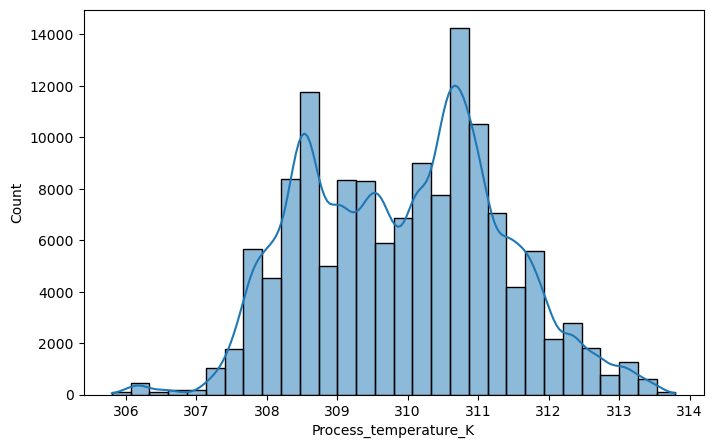

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(train['Process_temperature_K'], kde=True, bins=30)

<Axes: xlabel='Rotational_speed_rpm', ylabel='Count'>

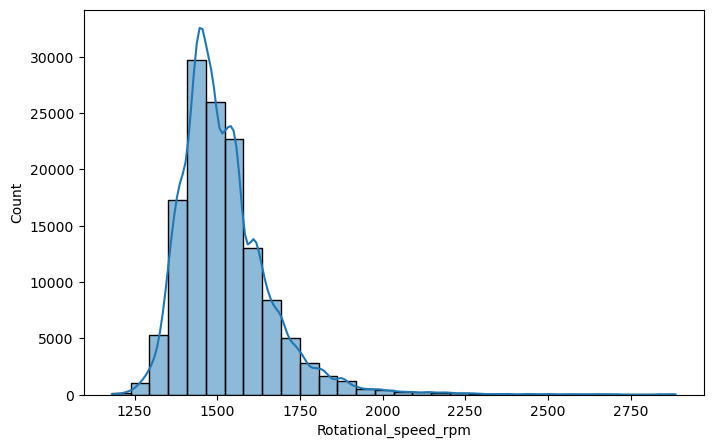

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(train['Rotational_speed_rpm'], kde=True, bins=30)

<Axes: xlabel='Torque_Nm', ylabel='Count'>

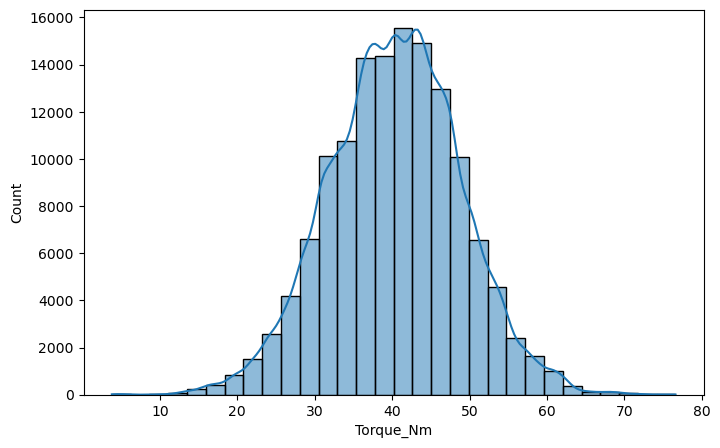

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(train['Torque_Nm'], kde=True, bins=30)

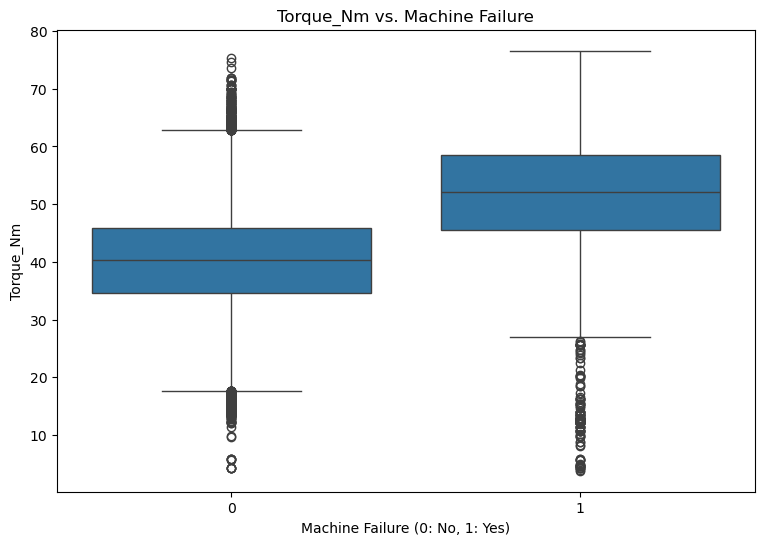

In [24]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Machine_failure', y='Torque_Nm', data=train)
plt.title('Torque_Nm vs. Machine Failure')
plt.xlabel('Machine Failure (0: No, 1: Yes)')
plt.ylabel('Torque_Nm')
plt.show()

<Axes: xlabel='Type', ylabel='count'>

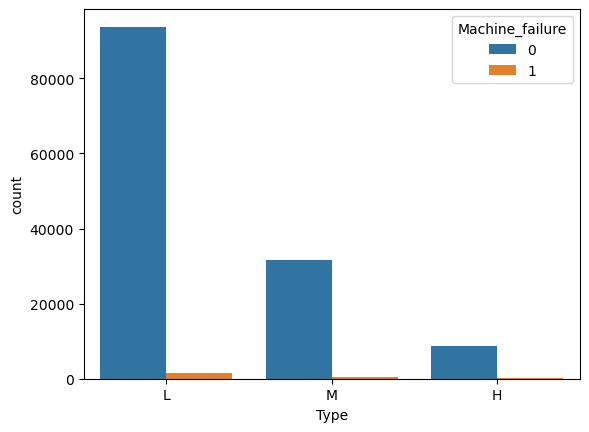

In [25]:
sns.countplot(x='Type', hue='Machine_failure', data=train)

<Axes: >

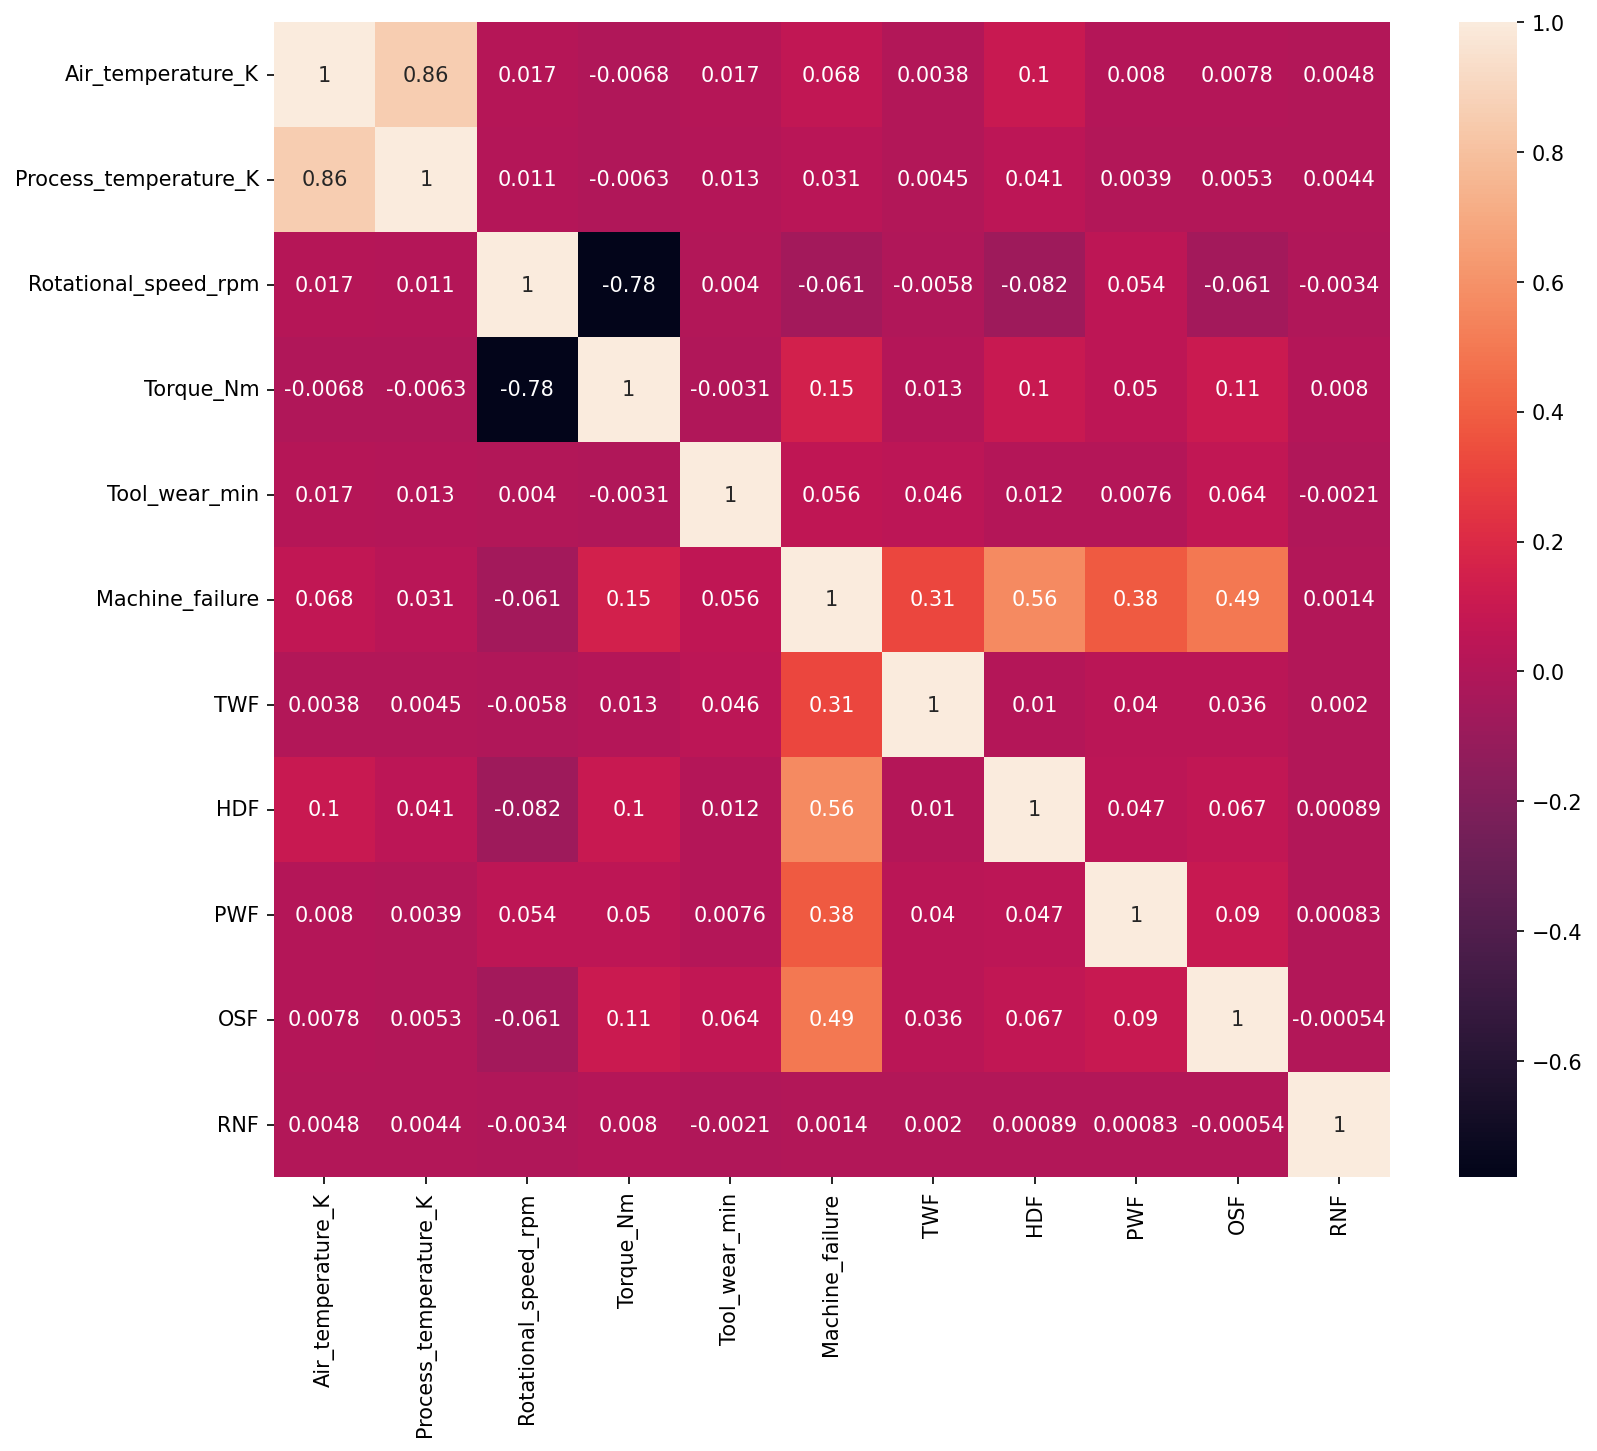

In [26]:
plt.figure(figsize=(12,10), dpi=150)
sns.heatmap(train.drop(columns=['id']).corr(numeric_only=True), annot=True)

## Feature Enginnering

In [27]:
#  Power (Watt) = Torque (Nm) * Rotational Speed (rad/s)
train['Power'] = train['Torque_Nm'] * (train['Rotational_speed_rpm'] * 2 * 3.14159 / 60)

In [28]:
# Temp_Difference (K) = Process Temperature (K) - Air Temperature (K)
train['Temp_Difference'] = train['Process_temperature_K'] - train['Air_temperature_K']

In [29]:
# Torque per Tool Wear = Torque (Nm) / Tool Wear (min)
train['Torque_per_Tool_wear'] = train['Torque_Nm'] / (train['Tool_wear_min'] + 1e-6)

## Data Preprocessing

In [30]:
x = train.drop(columns=['id','Machine_failure','Product_ID'])
y = train['Machine_failure']

In [31]:
x = pd.get_dummies(x, drop_first=True)

In [32]:
x.head()

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Power,Temp_Difference,Torque_per_Tool_wear,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,6033.486427,9.0,0.257857,True,False
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,5360.275106,9.5,0.145500,False,True
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,5009.003456,9.2,1.060000,True,False
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,7069.959800,9.9,0.224873,True,False
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,6083.312044,11.0,1.041176,False,True


## Modelling 

In [33]:


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)



In [34]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[26845     3]
 [  102   336]]
LogisticRegression()  modeli eğitiliyor!..
[[26848     0]
 [  438     0]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[26736   112]
 [   96   342]]
RandomForestClassifier()  modeli eğitiliyor!..
[[26844     4]
 [  102   336]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[26838    10]
 [  100   338]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[26798    50]
 [  379    59]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[26847     1]
 [  221   217]]
MultinomialNB()  modeli eğitiliyor!..
[[  733 26115]
 [    9   429]]
Eğitim tamamlandı.
En başarılı model:  BernoulliNB
Confusion Matrix:
[[26845     3]
 [  102   336]]
classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99     

,Accuracy,Precision,Recall,F1
BernoulliNB,0.996152,0.996152,0.996152,0.996152
RandomForestClassifier,0.996115,0.996115,0.996115,0.996115
GradientBoostingClassifier,0.995969,0.995969,0.995969,0.995969
DecisionTreeClassifier,0.992377,0.992377,0.992377,0.992377
AdaBoostClassifier,0.991864,0.991864,0.991864,0.991864
KNeighborsClassifier,0.984278,0.984278,0.984278,0.984278
LogisticRegression,0.983948,0.983948,0.983948,0.983948
MultinomialNB,0.042586,0.042586,0.042586,0.042586


## Conclusion

In this project, we successfully developed a **binary classification model** to predict potential machine failures based on operational sensor data.  
Through effective **feature engineering** — including Power (Torque × Rotational Speed), Temperature Difference, and Torque per Tool Wear — the dataset’s predictive capability was significantly improved.

Several machine learning models were trained and compared, such as **Logistic Regression**, **Decision Tree**, **Random Forest**, **Gradient Boosting**, **KNN**, **AdaBoost**, and **Naive Bayes**.  
Among them, **BernoulliNB** and **RandomForestClassifier** achieved the highest performance with around **0.996 accuracy and F1-score**, showing excellent predictive results.

The findings demonstrate that **sensor-based monitoring** can be effectively used for **predictive maintenance**, minimizing downtime, reducing operational costs, and improving reliability.  
For future work, model performance could be enhanced further through **hyperparameter tuning**, **ensemble stacking**, and **feature selection** techniques.
